# K Means and DBSCAN without dimensionally reduction

/var/folders/02/q3pl23992157gk433j0_qgwm0000gn/T/ipykernel_23009/2046766882.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('features.txt', header=None, delim_whitespace=True)
/var/folders/02/q3pl23992157gk433j0_qgwm0000gn/T/ipykernel_23009/2046766882.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('X_train.txt', header=None, delim_whitespace=True)
/var/folders/02/q3pl23992157gk433j0_qgwm0000gn/T/ipykernel_23009/2046766882.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('X_test.txt', header=None, delim_whitespace=True)


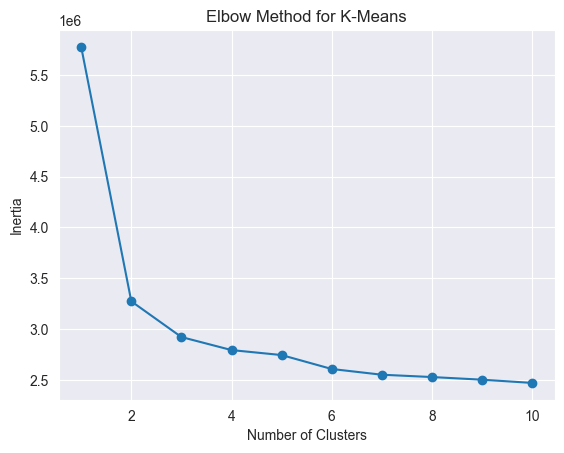

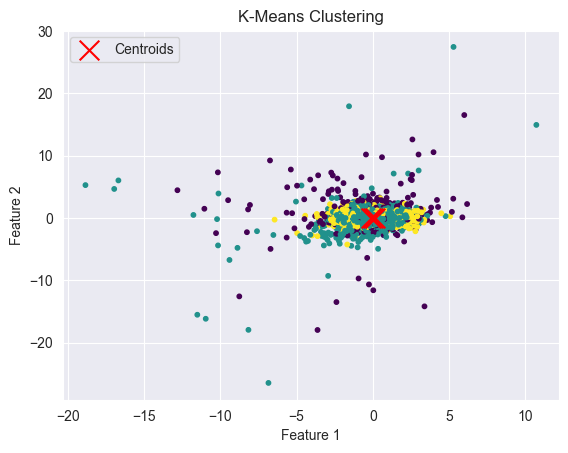

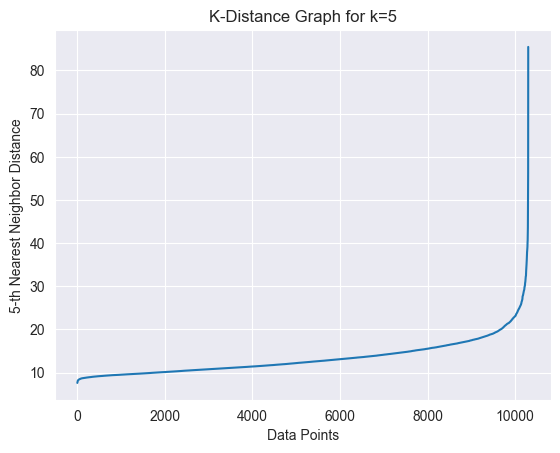

Optimal epsilon: 25
Optimal min_samples: 5


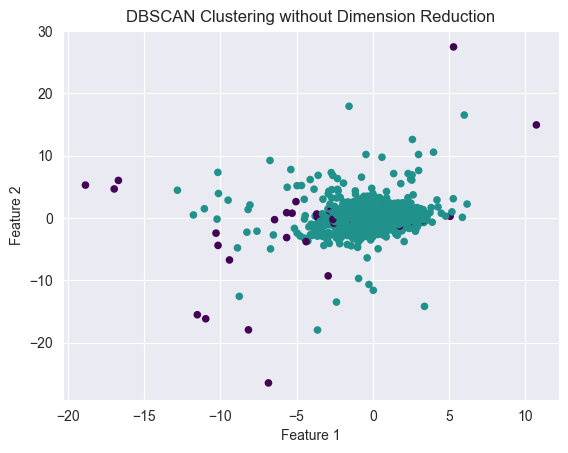

In [3]:
#This code is for K means and DBSCAN clustering without using dimensionally reduction technique

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# I will provide these three files with the project code so that these three files are in the same directory
features = pd.read_csv('features.txt', header=None, delim_whitespace=True)
X_train = pd.read_csv('X_train.txt', header=None, delim_whitespace=True)
X_test = pd.read_csv('X_test.txt', header=None, delim_whitespace=True)

X = pd.concat([X_train, X_test], axis=0)

# Data Preprocessing
X.columns = features.iloc[:, 1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering without applying dimensionally reduction technique

# Choosing the number of clusters using the Elbow Method
inertia_values = []
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph to determine number of clusters for K-Means
plt.plot(possible_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# I am choosing number of clusters (k=3) from the elbow method graph below
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# DBSCAN clustering without applying dimensionally reduction technique

# Calculate K distances
k_neighbors = 5
neigh = NearestNeighbors(n_neighbors=k_neighbors)
neigh.fit(X_scaled)
distances, _ = neigh.kneighbors(X_scaled)
sorted_distances = np.sort(distances[:, -1])

# Plotting K-distance graph to determine the optimal epsilon value for DBSCAN
plt.plot(range(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Data Points')
plt.ylabel(f'{k_neighbors}-th Nearest Neighbor Distance')
plt.title(f'K-Distance Graph for k={k_neighbors}')
plt.show()

# From the graph, we get the best epsilon value = 25, so we are using here 25 as the epsilon value
best_eps = 25
best_min_samples = 5

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

print(f"Optimal epsilon: {best_eps}")
print(f"Optimal min_samples: {best_min_samples}")

# Using only two features because there are so many features
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=20)
plt.title('DBSCAN Clustering without Dimension Reduction')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# K Means and DBSCAN with dimensionally reduction

/var/folders/02/q3pl23992157gk433j0_qgwm0000gn/T/ipykernel_23009/642826376.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('features.txt', header=None, delim_whitespace=True)
/var/folders/02/q3pl23992157gk433j0_qgwm0000gn/T/ipykernel_23009/642826376.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('X_train.txt', header=None, delim_whitespace=True)
/var/folders/02/q3pl23992157gk433j0_qgwm0000gn/T/ipykernel_23009/642826376.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('X_test.txt', header=None, delim_whitespace=True)


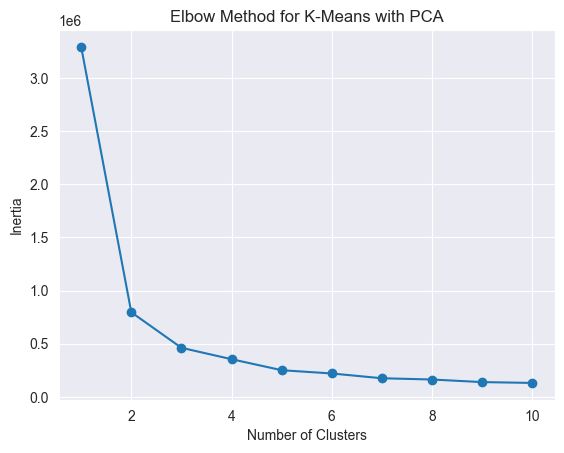

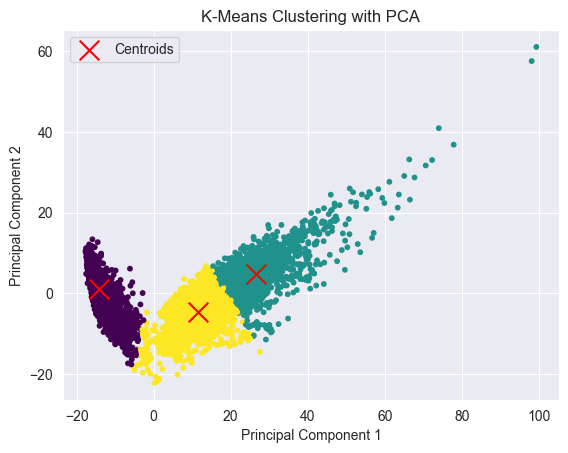

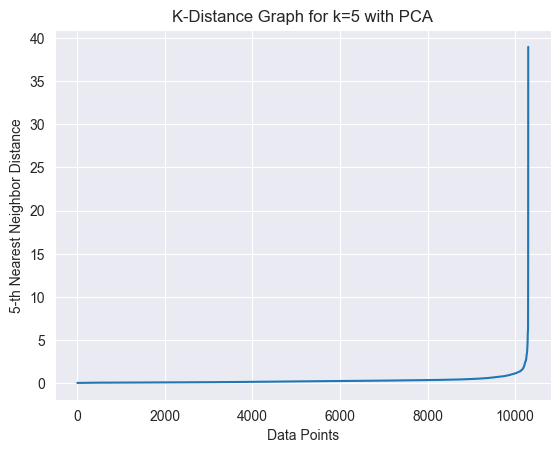

Optimal epsilon: 2
Optimal min_samples: 5


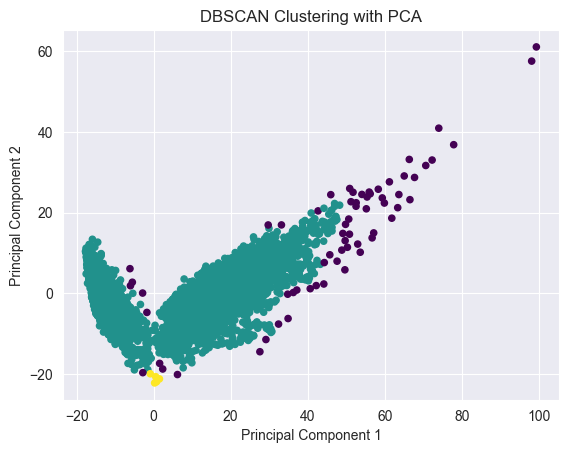

In [4]:
#This code is for K means and DBSCAN clustering with dimensionally reduction technique

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# I will provide these three files with the project code so that these three files are in the same directory
features = pd.read_csv('features.txt', header=None, delim_whitespace=True)
X_train = pd.read_csv('X_train.txt', header=None, delim_whitespace=True)
X_test = pd.read_csv('X_test.txt', header=None, delim_whitespace=True)

X = pd.concat([X_train, X_test], axis=0)

# Data Preprocessing
X.columns = features.iloc[:, 1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction using Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means clustering after applying dimensionally reduction technique i.e PCA

# Choosing the number of clusters using the Elbow Method
inertia_values = []
possible_clusters = range(1, 11)

for k in possible_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Method graph to determine number of clusters for K-Means
plt.plot(possible_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means with PCA')
plt.show()

# I am choosing number of clusters (k=3) from the elbow method graph below

# K-Means clustering with the chosen number of clusters and after applying PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# DBSCAN clustering after applying dimensionally reduction technique i.e PCA

k_neighbors = 5
neigh = NearestNeighbors(n_neighbors=k_neighbors)
neigh.fit(X_pca)
distances, _ = neigh.kneighbors(X_pca)
sorted_distances = np.sort(distances[:, -1])

plt.plot(range(1, len(sorted_distances) + 1), sorted_distances)
plt.xlabel('Data Points')
plt.ylabel(f'{k_neighbors}-th Nearest Neighbor Distance')
plt.title(f'K-Distance Graph for k={k_neighbors} with PCA')
plt.show()

# From the graph, we get the best epsilon value = 2, so we are using here 2 as the epsilon value
best_eps = 2
best_min_samples = 5

# DBSCAN clustering with the chosen parameters and PCA
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_pca)

print(f"Optimal epsilon: {best_eps}")
print(f"Optimal min_samples: {best_min_samples}")

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=20)
plt.title('DBSCAN Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()